# Proyecto Final - Python for Data Science
### Construccion de modelo predictivo de Regresion Lineal
#### Obtencion de Datos

In [25]:
import numpy as np
import pandas as pd
data = np.load("C:\\Users\\Fernando\\Documents\\STUFF\\GALILEO\\1-Python\\16. PROYECTO FINAL\\proyecto_training_data.npy")
before10 = data[0:10, :] #Viendo las primeras 1 filas de los datos.
#Explorando brevemente la estructura de los datos
print(len(data))
print(before10)
print(type(data))
print(len(data[0,:]))
print(len(data[:,0]))

1460
[[208500.      7.    856.      8.   2003.     65.]
 [181500.      6.   1262.      6.   1976.     80.]
 [223500.      7.    920.      6.   2001.     68.]
 [140000.      7.    961.      7.   1915.     60.]
 [250000.      8.   1145.      9.   2000.     84.]
 [143000.      5.    796.      5.   1993.     85.]
 [307000.      8.   1694.      7.   2004.     75.]
 [200000.      7.   1107.      7.   1973.     nan]
 [129900.      7.   1022.      8.   1931.     51.]
 [118000.      5.   1077.      5.   1939.     50.]]
<class 'numpy.ndarray'>
6
1460


#### Dividiendo el data set en 80% para entrenamiento y 20% para prueba. Almacenamos el set de entrenamiento en Pandas.DF

In [6]:
import random
from random import sample

#Dividiendo data set
tr= data[0:round(data.shape[0]*.8),:]
t = data[round(data.shape[0]*.8):,:]
#Almacenando Training set en un Pandas.DF
cols = np.array(["SalePrice", "OverallQual", "1stFloorSqf", "TotRmsAbvGrd", "YearBuilt","LotFrontage"])
tr = pd.DataFrame(data=tr[:,:],columns= cols)

#Validacion de registros entre data y el dataframe
data.shape[0]== t.shape[0]+ tr.shape[0]

#Removiendo formato de notacion científica de los datos
np.set_printoptions(suppress=True) 

#### Exploracion de Datos con Numpy

In [15]:
#Media
avg = np.nanmean(tr, axis=0)
#Max
maxx = np.nanmax(tr, axis=0)
#Min
minn = np.nanmin(tr, axis=0)
#rango(peak to peak)
rangos = np.array((cols,minn, maxx))
#sd 
sd = np.nanstd(tr, axis=0)

print('Media=' +'\n'+ str(avg)+2*'\n',
     'Max=' +'\n'+ str(maxx)+2*'\n',
      'Min=' +'\n'+ str(minn)+2*'\n',
      'Rangos=' +'\n'+ str(rangos)+2*'\n',
      'DesvEst=' +'\n'+ str(sd)+2*'\n'
     )

Media=
[180590.27739726      6.1010274    1156.32363014      6.48544521
   1971.45119863     69.94698545]

 Max=
[755000.     10.   3228.     14.   2010.    313.]

 Min=
[34900.     1.   334.     2.  1875.    21.]

 Rangos=
[['SalePrice' 'OverallQual' '1stFloorSqf' 'TotRmsAbvGrd' 'YearBuilt'
  'LotFrontage']
 ['34900.0' '1.0' '334.0' '2.0' '1875.0' '21.0']
 ['755000.0' '10.0' '3228.0' '14.0' '2010.0' '313.0']]

 DesvEst=
[78781.95108033     1.37743519   373.6203315      1.60845172
    29.93888207    23.46595482]




#### Para cada variable en el dataset usar seaborn para graficar  un histograma de la variable.

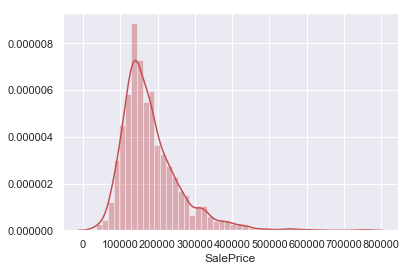

In [18]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set()
fixedtr = tr.dropna(axis=0)
#fixedtr.shape
#type(fixedtr)

#Sale Price
ax = sbn.distplot(tr.iloc[:,0], color='r')
plt.show()

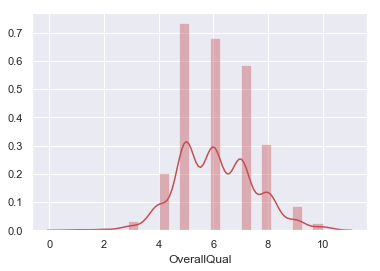

In [19]:
#["OverallQual"]
ax = sbn.distplot(tr.iloc[:,1], color='r')
plt.show()

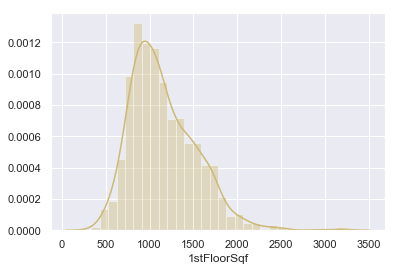

In [20]:
#["1stFloorSqf"]
ax = sbn.distplot(tr.iloc[:,2], color='y')
plt.show()

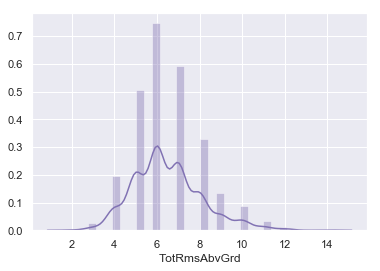

In [21]:
#["TotRmsAbvGrd"]
ax = sbn.distplot(tr.iloc[:,3], color='m')
plt.show()

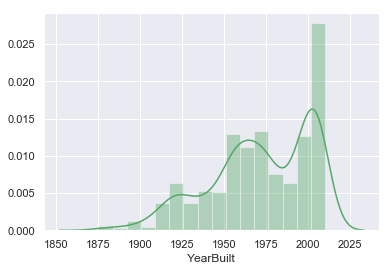

In [22]:
#["YearBuilt"]
ax = sbn.distplot(tr.iloc[:,4], color='g')
plt.show()

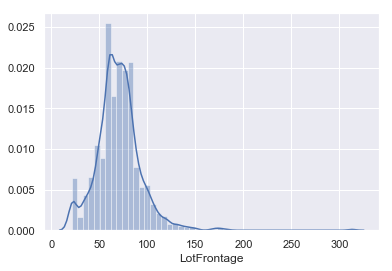

In [23]:
#["LotFrontage"]
ax = sbn.distplot(fixedtr.iloc[:,5], color='b')
plt.show()

#### Para cada variable independiente x: 
##### ○Calcular el coeficiente de correlación entre x y y

In [27]:
pd.set_option('display.max_columns', 10)
corr = tr.corr()
PriceVsX = corr.iloc[0,:] 
#Correlacion entre Precio Venta y todas las variables independientes (caracteristicas-features)
PriceVsX

SalePrice       1.000000
OverallQual     0.793990
1stFloorSqf     0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

##### ○	Graficar x vs y(scatterplot) usando matplotlib. 
Colocar el coeficiente de correlación como parte del título de la gráfica

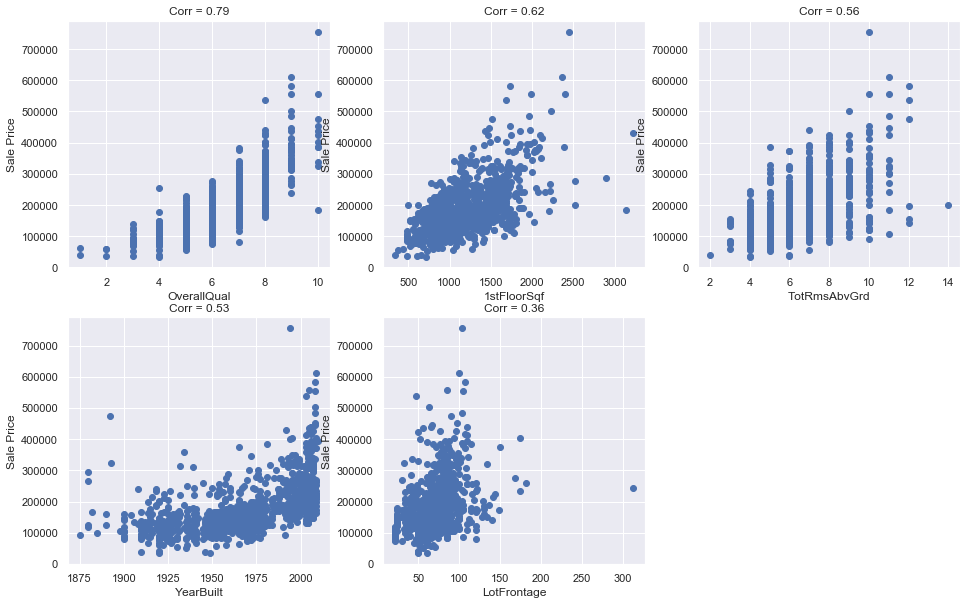

In [28]:
#Recordar que> cols = np.array(["SalePrice", "OverallQual", "1stFloorSqf", "TotRmsAbvGrd", "YearBuilt","LotFrontage"])
fig = plt.figure(figsize=(16,10))
axes = [None]*5
for i in range(1,6,1):
    axes[i-1] = fig.add_subplot(2,3,i)
    axes[i-1].scatter(tr.iloc[:,i],tr.iloc[:,0])
    axes[i-1].set_xlabel(cols[i])
    axes[i-1].set_ylabel('Sale Price')
    axes[i-1].set_title('Corr = '+ np.str(np.round(PriceVsX.iloc[i],2)))
    #plt.savefig('Test.pdf')

plt.show()

#### Crear una función para entrenar un modelo de regresión lineal de una variable 
## y = mx +b

In [164]:
def Training(x,y,epoch,errPrint, lr):
    dat = np.column_stack((x,np.ones_like(x)))
    parameters = [30450, -500]
    err = []
    data = np.array([['','m','b','err'],
                [0,30450,-500,None]])
    model = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])    
    for i in range(1,epoch+1,1):
        yhat = np.matmul(dat,parameters)  #Obteniendo prediccion con datos x y parametros m y b
        err.append(0.5*np.average(np.square(y-yhat))) #Almacenando error
        grad = np.matmul((yhat-y),dat)/len(y) #Obtencion de gradiente
        parameters -= lr*grad #Actualizacion de parametros segun LR y direccion de Gradiente
        
        #Almacenando iteraciones del modelo en Pandas.DF
        model = model.append(pd.Series([parameters[0], parameters[1],err[i-1]], index=model.columns), ignore_index=True)
        if errPrint%i==0:#Impresion de error segun parametro errPrint (imprimir error cada)
            print(model.iloc[i-1,:]) 
    return model, err

x = tr.iloc[:,1]
y = tr.iloc[:,0]
Training(x,y,epoch=800,errPrint=100, lr=0.05)

m      30450
b       -500
err     None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


(           m        b          err
 0      30450     -500         None
 1    30439.9   -734.3  1.37026e+09
 2      30521  -953.81  1.36921e+09
 3    30510.4 -1187.09  1.36816e+09
 4    30591.7 -1405.47  1.36711e+09
 5    30580.6 -1637.73  1.36607e+09
 6    30662.1    -1855  1.36503e+09
 7    30650.5 -2086.25    1.364e+09
 8    30732.1  -2302.4  1.36298e+09
 9      30720 -2532.64  1.36195e+09
 10   30801.8 -2747.69  1.36094e+09
 11   30789.2 -2976.93  1.35993e+09
 12   30871.2 -3190.87  1.35892e+09
 13   30858.1 -3419.11  1.35792e+09
 14   30940.3 -3631.95  1.35692e+09
 15   30926.6  -3859.2  1.35593e+09
 16     31009 -4070.95  1.35494e+09
 17   30994.9 -4297.22  1.35395e+09
 18   31077.4 -4507.87  1.35297e+09
 19   31062.8 -4733.16    1.352e+09
 20   31145.5 -4942.72  1.35103e+09
 21   31130.3 -5167.04  1.35007e+09
 22   31213.2 -5375.52   1.3491e+09
 23   31197.6 -5598.86  1.34815e+09
 24   31280.7 -5806.27   1.3472e+09
 25   31264.5 -6028.65  1.34625e+09
 26   31347.8 -6234.98  1.34

#### Variacion del Error en el Tiempo

m       0.3
b       0.2
err    None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


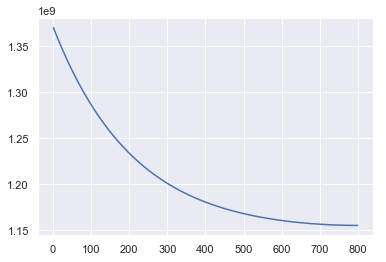

In [145]:
import matplotlib.pyplot as plt1

def ErrInTime(Errors):
    plt1.plot(range(1,len(Errors)+1),Errors)
    return
    
O=Training(x,y,epoch=800 ,errPrint=100, lr=0.05)
ErrInTime(O[1])

#### Variacion del Modelo en el Tiempo

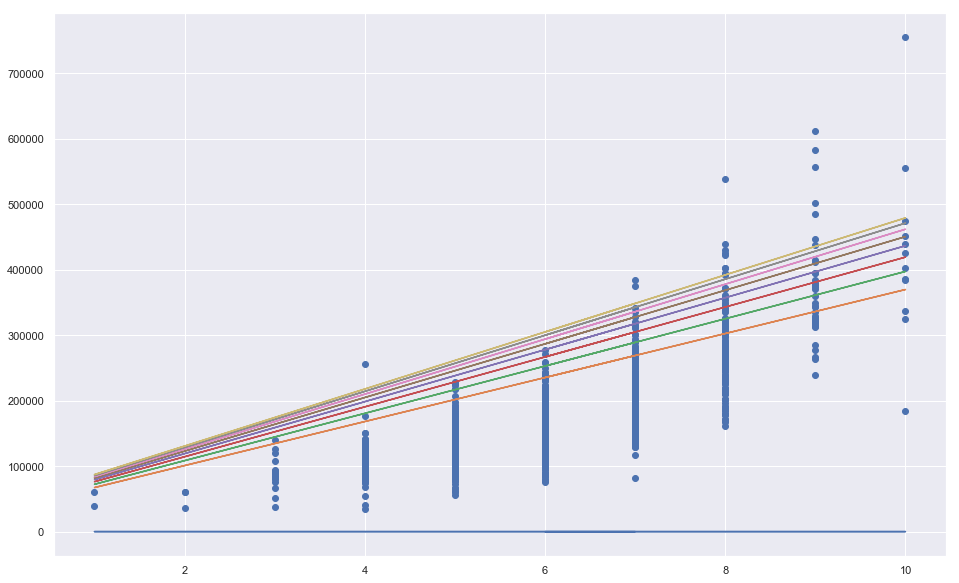

In [165]:
def ModInTime(Mod,n):
    import matplotlib.pyplot as plt2
    fig1 = plt2.figure(figsize=(16,10))
    ax1 = fig1.add_subplot(1,1,1)
    ax1.scatter(tr.iloc[:,1],tr.iloc[:,0])
    steps = range(0,len(Mod.iloc[:,0]),n)
    for step in steps:
        ax1.plot(tr.iloc[:,1],
                 tr.iloc[:,1]*Mod.iloc[step,0]+Mod.iloc[step,0])
    return

ModInTime(Mod=O[0],n=100)


#### Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas.
Basándose en las  funciones para graficar las curvas de aprendizaje  y comparación del modelo vs los datos, elegir el número de “epochs” o iteraciones a entrenar el modelo(y experimentar con el learning _rate).

m      30450
b       -500
err     None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


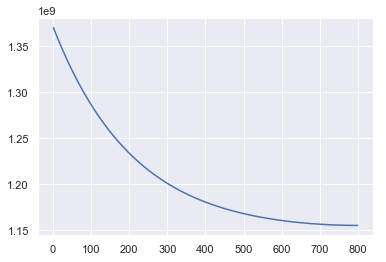

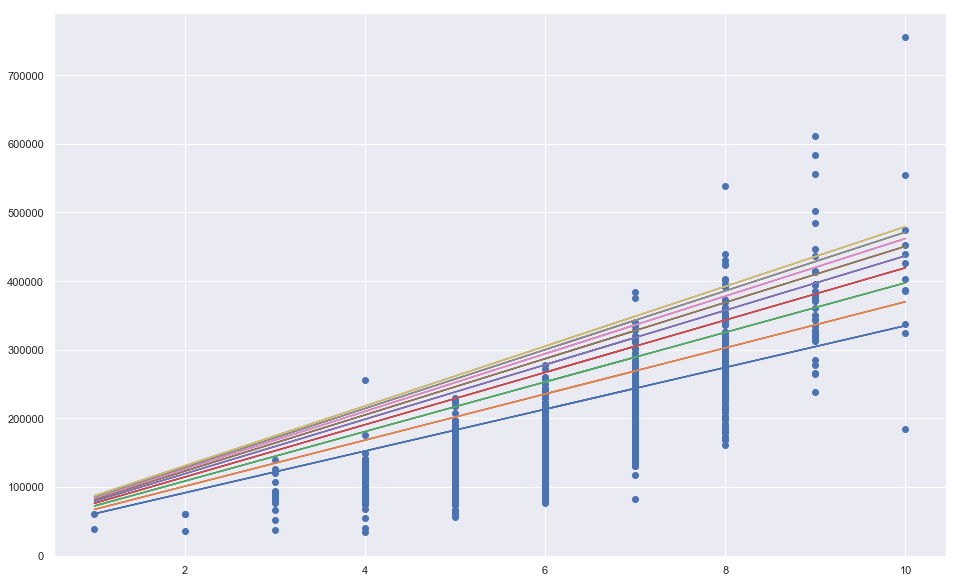

In [181]:
#OVerallQual
y = tr.iloc[:,0] #Price
x = tr.iloc[:,1] #QUalification

OverallQualf =Training(x,y,epoch=800 ,errPrint=100, lr=0.05)
ErrInTime(OverallQualf[1])
ModInTime(Mod=OverallQualf[0],n=100)

m      30450
b       -500
err     None
Name: 0, dtype: object
m         30405.3
b        -500.035
err    6.7768e+14
Name: 1, dtype: object
m            30316
b         -500.105
err    6.73686e+14
Name: 3, dtype: object
m          30271.4
b          -500.14
err    6.71698e+14
Name: 4, dtype: object
m          30049.7
b         -500.313
err    6.61845e+14
Name: 9, dtype: object
m         29611.2
b        -500.657
err    6.4257e+14
Name: 19, dtype: object
m          29394.3
b         -500.827
err    6.33144e+14
Name: 24, dtype: object
m          28333.8
b         -501.657
err    5.88049e+14
Name: 49, dtype: object
m          26326.7
b         -503.228
err    5.07265e+14
Name: 99, dtype: object


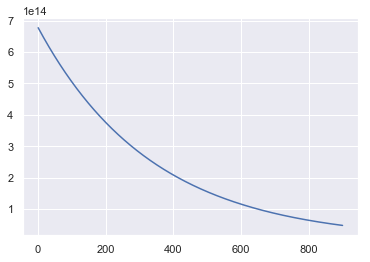

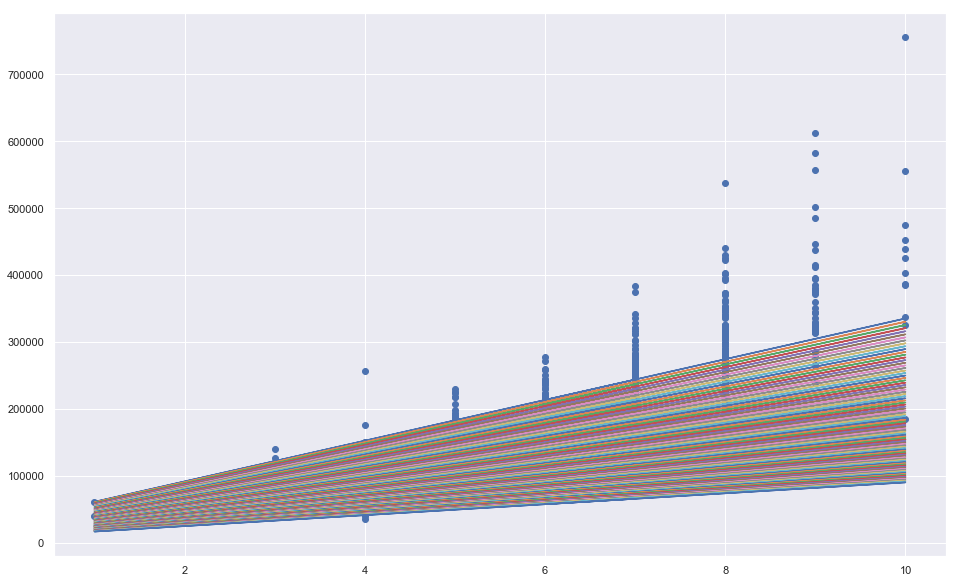

In [185]:
#1stFloorSqf
x2 = tr.iloc[:,2] #Sqfeets

FstF =Training(x2,y,epoch=900 ,errPrint=100, lr=0.000000001)
ErrInTime(FstF[1])
ModInTime(Mod=FstF[0],n=10)